In [2]:
import neuraltda.topology2 as tp2
import pandas as pd
from joblib import Parallel, delayed
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import datetime
import pickle
import glob
import os
from ephys import core, events, clust
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import h5py as h5
%matplotlib inline
import seaborn as sns
sns.set_context('poster')
sns.set_style('white')

# Set the parameters for the histograms and bin the spikes

In [3]:
# Rebin with 5ms, no overlap, start+2500ms to end+300ms, correct trials
block_path = '/home/brad/emily/P01S15/'
block_path = '/home/brad/emily/P01S13/'
block_path = '/home/brad/emily/P01S18/'
winsize = 5.0
dtover = 0.0
segment = [2500, 300]

cluster_group = ['Good', 'MUA']
#widenarrow_threshold = 0.000230 # sw threshold in seconds P01S15
widenarrow_threshold = 0.000240 #P01S18

In [4]:
spikes = core.load_spikes(block_path)
trials = events.load_trials(block_path)
fs = core.load_fs(block_path)

# Get wide/narrow clusters
clusters = core.load_clusters(block_path)
clusters_list = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()
(wide, narrow) = clust.get_wide_narrow(block_path, clusters_list, widenarrow_threshold)

# Get Correct/Incorrect Trials
correctTrials = trials[trials['correct']==True]
incorrectTrials = trials[trials['correct']==False]
passiveTrials = trials[-(trials['correct'].isin([True, False]))]

print(trials['stimulus'].unique())

# Bin Correct Trials
bfdict = tp2.do_dag_bin_lazy(block_path, spikes, correctTrials, clusters, fs, winsize,
                                    segment, cluster_group=['Good', 'MUA'],
                                    dt_overlap=dtover, comment='SD-emily-reanalysis-correct')
bdf_correct = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf_correct))

# Bin Incorrect Trials
bfdict = tp2.do_dag_bin_lazy(block_path, spikes, incorrectTrials, clusters, fs, winsize,
                                    segment, cluster_group=['Good', 'MUA'],
                                    dt_overlap=dtover, comment='SD-emily-reanalysis-incorrect')
bdf_incorrect = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf_incorrect))

# Bin Passive Trials
bfdict = tp2.do_dag_bin_lazy(block_path, spikes, passiveTrials, clusters, fs, winsize,
                                    segment, cluster_group=['Good', 'MUA'],
                                    dt_overlap=dtover, comment='SD-emily-reanalysis-passive')
bdf_passive = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
print('BDF: {}'.format(bdf_incorrect))

['Repeat_15_1052sec5_sqzdn_65db' 'Repeat_58_1052sec3_sqzup_65db'
 'Repeat_23_C22sec2_sqzdn_65db' 'Repeat_44_B32sec1_sqzup_65db' 'T58S58D-1'
 'T58S58D23' 'T58S44D23' 'T58S44D-1' 'T-1S-1D23' 'T58S44D21' 'T58S58D7'
 'T23S15D-1' 'T23S23D58' 'T23S23D-1' 'T-1S-1D58' 'T23S15D58' 'T23S23D52'
 'T23S15D60' 'T58S58D15' 'T58S44D15' 'T-1S-1D15' 'T23S15D44' 'T23S23D44'
 'T-1S-1D44']
BDF: /home/brad/emily/P01S18/binned_data/win-5.0_dtovr-0.0_seg-2500-300-SD-emily-reanalysis-correct/20170717T171936Z-5.0-0.0.binned
BDF: /home/brad/emily/P01S18/binned_data/win-5.0_dtovr-0.0_seg-2500-300-SD-emily-reanalysis-incorrect/20170717T171950Z-5.0-0.0.binned
BDF: /home/brad/emily/P01S18/binned_data/win-5.0_dtovr-0.0_seg-2500-300-SD-emily-reanalysis-incorrect/20170717T171950Z-5.0-0.0.binned


- - - 
# Setup contexts

In [7]:
# contexts:
P01S15_context_stimuli = {
    'A_hi': 'T40S40D3',
    'A_lo': 'T3S3D40',
    'AS_hi': 'T40S40D-1',
    'AS_lo': 'T3S3D-1',
    'ASX_hi': 'T40S40D-1',
    'ASX_lo': 'T3S3D-1',
    'AX_hi': 'T40S40D3',
    'AX_lo': 'T3S3D40',
    'P_hi': 'T40S40D3',
    'P_lo': 'T3S3D40'
}

P01S13_context_stimuli = {
    'A_hi': 'T40S40D3',
    'A_lo': 'T3S3D40',
    'AS_hi': 'T40S40D-1',
    'AS_lo': 'T3S3D-1',
    'ASX_hi': 'T40S40D-1',
    'ASX_lo': 'T3S3D-1',
    'AX_hi': 'T40S40D3',
    'AX_lo': 'T3S3D40',
    'P_hi': 'T40S40D3',
    'P_lo': 'T3S3D40'
}

P01S18_context_stimuli = {
    'A_hi': 'T58S58D23',
    'A_lo': 'T23S23D58',
    'AS_hi': 'T58S58D-1',
    'AS_lo': 'T23S23D-1',
    'ASX_hi': 'T58S58D-1',
    'ASX_lo': 'T23S23D-1',
    'AX_hi': 'T58S58D23',
    'AX_lo': 'T23S23D58',
    'P_hi': 'T58S58D23',
    'P_lo': 'T23S23D58'
}
context_bdf = {
    'A_hi': bdf_correct,
    'A_lo': bdf_correct,
    'AS_hi': bdf_correct,
    'AS_lo': bdf_correct,
    'ASX_hi': bdf_incorrect,
    'ASX_lo': bdf_incorrect,
    'AX_hi': bdf_incorrect,
    'AX_lo': bdf_incorrect,
    'P_hi': bdf_passive,
    'P_lo': bdf_passive
}
contexts = [
    'A_hi',
    'A_lo',
    'AS_hi',
    'AS_lo',
    #'AX_hi',
    #'AX_lo',
    #'ASX_hi',
    #'ASX_lo',
    'P_hi',
    'P_lo'
]
context_stimuli = P01S18_context_stimuli

## Compute Average PSTHs

In [8]:
# compute average psths
avg_psths = {}
for context in contexts:
    with h5.File(context_bdf[context], 'r') as binned_data:
        stim = context_stimuli[context]
        fulldata = np.array(binned_data[stim]['pop_tens'])
        avg_psth = np.mean(fulldata, axis=2)
        avg_psths[str(context)] = avg_psth
        binned_clusters = np.array(binned_data[stim]['clusters'])

##  Mean-squared-error functions

In [9]:
# Compute MSEs:
from scipy import signal

def mse(psth_a, psth_b, psth_c, psth_d):
    la = psth_a.shape
    lb = psth_b.shape
    lc = psth_c.shape
    ld = psth_d.shape
    
    new_a = np.zeros((la[0], max(la[1], lb[1])))
    new_b = np.zeros((lb[0], max(la[1], lb[1])))
    new_a[:la[0], :la[1]] = psth_a
    new_b[:lb[0], :lb[1]] = psth_b
    
    new_c = np.zeros((lc[0], max(lc[1], ld[1])))
    new_d = np.zeros((ld[0], max(lc[1], ld[1])))
    new_c[:lc[0], :lc[1]] = psth_c
    new_d[:ld[0], :ld[1]] = psth_d
    
    mse_ab = np.sum(np.square(psth_a - psth_b), axis=1) /  (psth_a.shape[1])
    mse_cd = np.sum(np.square(psth_c - psth_d), axis=1) /  (psth_c.shape[1])
    return mse_ab + mse_cd

def mse_vec(psth_a, psth_b, psth_c, psth_d):
    
    la = psth_a.shape
    lb = psth_b.shape
    lc = psth_c.shape
    ld = psth_d.shape
    new_a = np.zeros((la[0], max(la[1], lb[1])))
    new_b = np.zeros((lb[0], max(la[1], lb[1])))
    new_a[:la[0], :la[1]] = psth_a
    new_b[:lb[0], :lb[1]] = psth_b
    
    new_c = np.zeros((lc[0], max(lc[1], ld[1])))
    new_d = np.zeros((ld[0], max(lc[1], ld[1])))
    new_c[:lc[0], :lc[1]] = psth_c
    new_d[:ld[0], :ld[1]] = psth_d
    
    mse_ab = np.square(new_a - new_b)
    mse_cd = np.square(new_c - new_d)
    return mse_ab + mse_cd

def exp_filt(vec, tau):
    M=51
    win = signal.exponential(M, 0, tau, False)
    return np.convolve(vec, win, mode='same')
    

## Compute Response Biases

In [11]:
MSE_targ = mse(avg_psths['A_hi'], avg_psths['AS_hi'], avg_psths['A_lo'], avg_psths['AS_lo'])
MSE_dist = mse(avg_psths['A_hi'], avg_psths['AS_lo'], avg_psths['A_lo'], avg_psths['AS_hi'])
MSE_diff = MSE_dist - MSE_targ

MSE_targ_vec = mse_vec(avg_psths['A_hi'], avg_psths['AS_hi'], avg_psths['A_lo'], avg_psths['AS_lo'])
MSE_dist_vec = mse_vec(avg_psths['A_hi'], avg_psths['AS_lo'], avg_psths['A_lo'], avg_psths['AS_hi'])
MSE_diffC_vec = MSE_dist_vec - MSE_targ_vec

#MSE_targX_vec = mse_vec(avg_psths['AX_hi'], avg_psths['AS_hi'], avg_psths['AX_lo'], avg_psths['AS_lo'])
#MSE_distX_vec = mse_vec(avg_psths['AX_hi'], avg_psths['AS_lo'], avg_psths['AX_lo'], avg_psths['AS_hi'])
#MSE_diffX_vec = MSE_dist_vec - MSE_targ_vec

MSE_targP_vec = mse_vec(avg_psths['P_hi'], avg_psths['AS_hi'], avg_psths['P_lo'], avg_psths['AS_lo'])
MSE_distP_vec = mse_vec(avg_psths['P_hi'], avg_psths['AS_lo'], avg_psths['P_lo'], avg_psths['AS_hi'])
MSE_diffP_vec = MSE_dist_vec - MSE_targ_vec

MSE_diffs = np.stack([MSE_diffC_vec, 
                      #MSE_diffX_vec, 
                      MSE_diffP_vec], axis=-1)
MSE_max = np.amax(MSE_diffs, axis=(1,2)) #get absolute maximum across bins/conditions for each cell
MSE_diffs_normalized = np.divide(MSE_diffs, np.tile(MSE_max[:, np.newaxis, np.newaxis], (1, MSE_diffs.shape[1], 2)))
MSE_diffs_norm_mean = np.nanmean(MSE_diffs_normalized, axis=1)

MSE_diffs = MSE_diffC_vec
MSE_max = np.amax(MSE_diffs, axis=1)
MSE_diffs_normalized = np.divide(MSE_diffs, np.tile(MSE_max[:, np.newaxis], (1, MSE_diffs.shape[1])))
MSE_diffs_norm_mean = np.nanmean(MSE_diffs_normalized, axis=1)

/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice
/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: Mean of empty slice


##  Compute Attention Modulation

In [12]:
# compute attention modulation
from scipy.stats import wilcoxon


MSE_psth_passive = mse_vec(avg_psths['P_hi'], avg_psths['P_lo'], avg_psths['P_hi'], avg_psths['P_lo'])/2.0
MSE_psth_correct = mse_vec(avg_psths['A_hi'], avg_psths['A_lo'], avg_psths['A_hi'], avg_psths['A_lo'])/2.0
mt = np.amin([MSE_psth_correct.shape[1], MSE_psth_passive.shape[1]])
nsig = 0
sig_cells = []
for cell in range(MSE_psth_correct.shape[0]):
    
    (T, p) = wilcoxon(MSE_psth_passive[cell, :mt], MSE_psth_correct[cell, :mt])
    eff_size = T / np.sqrt(2500)
    sig = ''
    if p < 0.05:
        nsig += 1
        sig = 'X'
        sig_cells.append(cell)
    print('p: {:6.6f}     Effect Size: {:8.1f}  '.format(p, eff_size)+sig)
    
print('Proportion: {:6.6f}'.format(nsig/MSE_psth_correct.shape[0]))

p: 0.000000     Effect Size:    688.1  X
p: 0.571913     Effect Size:     18.5  
p: 0.772716     Effect Size:     28.9  
p: 0.741393     Effect Size:      1.6  
p: 0.011545     Effect Size:    717.7  X
p: 0.103491     Effect Size:      0.2  
p: 0.000015     Effect Size:    721.2  X
p: 0.076940     Effect Size:    589.9  
p: 0.571422     Effect Size:     84.1  
p: 0.500134     Effect Size:    125.6  
p: 0.000000     Effect Size:    573.5  X
p: 0.051407     Effect Size:    245.2  
p: 0.000006     Effect Size:    743.5  X
p: 0.126799     Effect Size:    278.8  
p: 0.328443     Effect Size:      0.4  
p: 0.362160     Effect Size:      5.5  
p: 0.637844     Effect Size:    215.3  
p: 0.000000     Effect Size:    674.9  X
p: 0.402466     Effect Size:     75.6  
p: 0.279983     Effect Size:      0.4  
p: 0.000235     Effect Size:      0.5  X
p: 0.000000     Effect Size:    390.8  X
p: 0.382033     Effect Size:      0.8  
p: 0.081682     Effect Size:      6.0  
p: 0.866258     Effect Size:    

/home/brad/.conda/envs/neuraltda-3/lib/python3.6/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


## Filter Wide/Narrow Response Biases

In [13]:
# Break into wide/narrow
wide_mse_diff = MSE_diffs_norm_mean[np.in1d(binned_clusters, wide)]
narrow_mse_diff = MSE_diffs_norm_mean[np.in1d(binned_clusters, narrow)]

#Print wide
print('Wide Clusters')
for ind, val in enumerate(wide_mse_diff):
    print("Cluster: {:3.0f}    MSE Diff: {:10.4f}".format(float(ind), val))
    
#Print Narrow
print('Narrow Clusters')
for ind, val in enumerate(narrow_mse_diff):
    print("Cluster: {:3.0f}    MSE Diff: {:10.4f}".format(float(ind), val))
    
# only attn modulate:

attn_clus = binned_clusters[sig_cells]
MSE_d_attn = MSE_diffs_norm_mean[sig_cells]
wide_attn_mse_diff = MSE_d_attn[np.in1d(attn_clus, wide)]
narrow_attn_mse_diff = MSE_d_attn[np.in1d(attn_clus, narrow)]

#Print wide
print('Wide Clusters')
for ind, val in enumerate(wide_attn_mse_diff):
    print("Cluster: {:3.0f}    MSE Diff: {:10.4f}".format(float(ind), val))
    
#Print Narrow
print('Narrow Clusters')
for ind, val in enumerate(narrow_attn_mse_diff):
    print("Cluster: {:3.0f}    MSE Diff: {:10.4f}".format(float(ind), val))

Wide Clusters
Cluster:   0    MSE Diff:        nan
Cluster:   1    MSE Diff:    -0.0011
Cluster:   2    MSE Diff:     0.0070
Cluster:   3    MSE Diff:    -0.0003
Cluster:   4    MSE Diff:    -0.0097
Cluster:   5    MSE Diff:        nan
Cluster:   6    MSE Diff:       -inf
Cluster:   7    MSE Diff:     0.0006
Cluster:   8    MSE Diff:     0.0002
Cluster:   9    MSE Diff:        nan
Cluster:  10    MSE Diff:     0.0022
Cluster:  11    MSE Diff:     0.0059
Cluster:  12    MSE Diff:     0.0024
Cluster:  13    MSE Diff:     0.0025
Cluster:  14    MSE Diff:     0.0028
Cluster:  15    MSE Diff:    -0.0034
Cluster:  16    MSE Diff:     0.0035
Cluster:  17    MSE Diff:        nan
Cluster:  18    MSE Diff:    -0.0053
Cluster:  19    MSE Diff:    -0.0221
Cluster:  20    MSE Diff:     0.0036
Cluster:  21    MSE Diff:    -0.0025
Cluster:  22    MSE Diff:     0.0054
Cluster:  23    MSE Diff:     0.0055
Cluster:  24    MSE Diff:       -inf
Cluster:  25    MSE Diff:    -0.0189
Cluster:  26    MSE Diff

## Response Bias Histogram over All Cells

-0.00060639069242
-3.18364356391e-05
0.254397965865


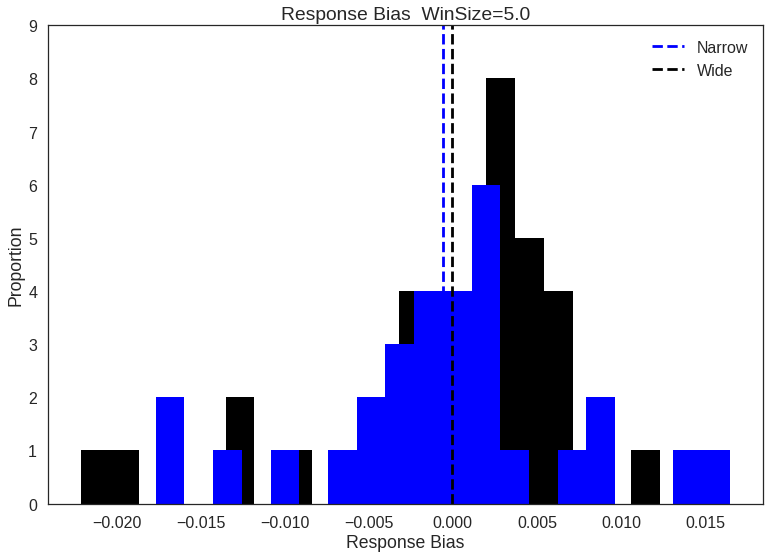

In [14]:
nbins = 20
wide_finite = wide_mse_diff[~np.logical_or(np.isnan(wide_mse_diff), np.isinf(wide_mse_diff))]
narrow_finite = narrow_mse_diff[~np.logical_or(np.isnan(narrow_mse_diff), np.isinf(narrow_mse_diff))]
(n1, bin1, p1) = plt.hist(wide_mse_diff[~np.logical_or(np.isnan(wide_mse_diff), np.isinf(wide_mse_diff))], nbins, facecolor='k', normed=False)
(n2, bin2, p2) = plt.hist(narrow_mse_diff[~np.logical_or(np.isnan(narrow_mse_diff), np.isinf(narrow_mse_diff))], nbins, facecolor='b', normed=False)
narrow_mean = np.mean(narrow_mse_diff[~np.logical_or(np.isnan(narrow_mse_diff), np.isinf(narrow_mse_diff))])
wide_mean = np.mean(wide_mse_diff[~np.logical_or(np.isnan(wide_mse_diff), np.isinf(wide_mse_diff))])
plt.plot([narrow_mean, narrow_mean], [0, 200], 'b--')
plt.plot([wide_mean, wide_mean], [0, 200], 'k--')
plt.ylim([0, np.amax(np.stack([n1, n2], axis=-1))+1])
plt.title('Response Bias  WinSize={}'.format(winsize))
plt.xlabel('Response Bias')
plt.ylabel('Proportion')
plt.legend(['Narrow', 'Wide'])
plt.savefig(os.path.join(block_path, 'ResponseBiasHistogram_{}.png'.format(winsize)))

print(narrow_mean)
print(wide_mean)

from scipy.stats import mannwhitneyu
(U, p) = mannwhitneyu(wide_finite, narrow_finite, alternative='two-sided')
print(p)

## Response Bias Histogram over Significantly Attention-Modulated Cells

-0.000633325759923
-0.00409813274108
0.419375222696


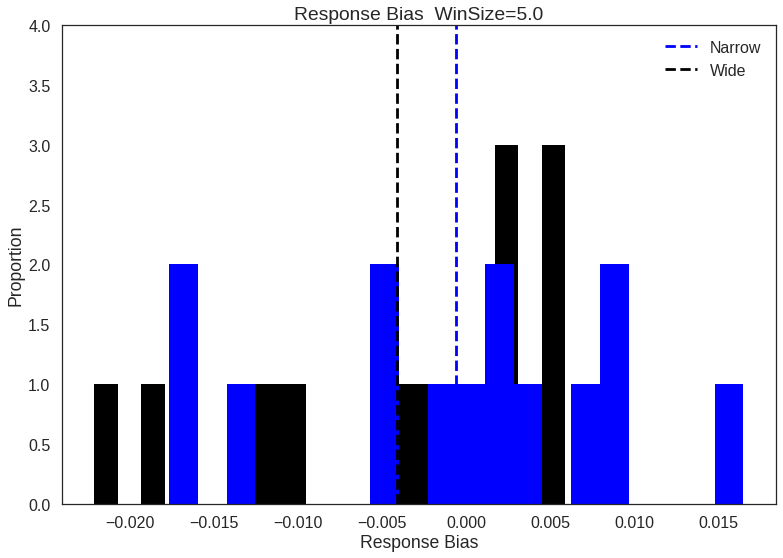

In [15]:
nbins = 20
wide_attn_finite = wide_attn_mse_diff[~np.logical_or(np.isnan(wide_attn_mse_diff), np.isinf(wide_attn_mse_diff))]
narrow_attn_finite = narrow_attn_mse_diff[~np.logical_or(np.isnan(narrow_attn_mse_diff), np.isinf(narrow_attn_mse_diff))]
(n1, bin1, p1) = plt.hist(wide_attn_finite, nbins, facecolor='k', normed=False)
(n2, bin2, p2) = plt.hist(narrow_attn_finite, nbins, facecolor='b', normed=False)
narrow_mean = np.mean(narrow_attn_finite)
wide_mean = np.mean(wide_attn_finite)
plt.plot([narrow_mean, narrow_mean], [0, 200], 'b--')
plt.plot([wide_mean, wide_mean], [0, 200], 'k--')
plt.ylim([0, np.amax(np.stack([n1, n2], axis=-1))+1])
plt.title('Response Bias  WinSize={}'.format(winsize))
plt.xlabel('Response Bias')
plt.ylabel('Proportion')
plt.legend(['Narrow', 'Wide'])
plt.savefig(os.path.join(block_path, 'ResponseBiasHistogram_AttnUnits_{}.png'.format(winsize)))

print(narrow_mean)
print(wide_mean)
from scipy.stats import mannwhitneyu
(U, p) = mannwhitneyu(wide_attn_finite, narrow_attn_finite, alternative='two-sided')
print(p)

In [ ]:
# compute max firing rate from each cell

psths = np.stack([avg_psths[x] for x in avg_psths.keys()], axis=-1)
maxfr = np.amax(psths, axis=(1,2))

In [ ]:
# Stimulus Response Error

SRE_C_hi = np.mean(np.square(avg_psths['AS_hi'] - avg_psths['A_hi']), axis=1)
SRE_C_lo = np.mean(np.square(avg_psths['AS_lo'] - avg_psths['A_lo']), axis=1)
SRE_X_hi = np.mean(np.square(avg_psths['ASX_hi'] - avg_psths['AX_hi']), axis=1)
SRE_X_lo = np.mean(np.square(avg_psths['ASX_lo'] - avg_psths['AX_lo']), axis=1)
SRE_C = np.mean(np.stack([SRE_C_hi, SRE_C_lo], axis=-1), axis=1)
SRE_X = np.mean(np.stack([SRE_X_hi, SRE_X_lo], axis=-1), axis=1)

SRE_C_norm = np.divide(SRE_C, maxfr)
SRE_X_norm = np.divide(SRE_X, maxfr)
plt.plot(SRE_C_norm, SRE_X_norm, 'k.')
plt.plot(np.arange(np.amax(SRE_C_norm)), np.arange(np.amax(SRE_C_norm)), 'k--')
plt.xlabel('Correct Trial SRE')
plt.ylabel('Incorrect Trial SRE')
plt.title('SRE   Winsize: {}'.format(winsize))
plt.savefig(os.path.join(block_path, 'StimulusResponseErrorScatter_{}.png'.format(winsize)))


In [ ]:
mean_SRE_C = np.mean(SRE_C_norm)
mean_SRE_X = np.mean(SRE_X_norm)
index = np.arange(2)/2
bar_width = 0.15
std_C = np.std(SRE_C_norm) / np.sqrt(len(SRE_C_norm))
std_X = np.std(SRE_X_norm) / np.sqrt(len(SRE_X_norm))

plt.figure()
plt.bar(index, [mean_SRE_C, mean_SRE_X], bar_width, yerr=(std_C, std_X))
plt.xlabel('Trial')
plt.ylabel('Stimulus Response Error')
plt.title('Stimulus Response Error')
plt.xticks(index, ('C', 'X'))
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(block_path, 'SREBar_{}.png'.format(winsize)))


In [ ]:
def subtract_mean(arr, axis):
    
    shp = arr.shape
    means = np.mean(arr, axis=axis)
    meanmat = np.tile(means[:, np.newaxis], (1, shp[1]))
    return np.subtract(arr,meanmat)

# PSTH Correlation

P_hi = subtract_mean(avg_psths['P_hi'], 1)
P_lo = subtract_mean(avg_psths['P_lo'], 1)
A_hi = subtract_mean(avg_psths['A_hi'], 1)
A_lo = subtract_mean(avg_psths['A_lo'], 1)

P = np.diag(np.dot(P_hi, P_lo.T))
P_norm = np.sqrt(np.multiply(np.diag(np.dot(P_hi, P_hi.T)), np.diag(np.dot(P_lo, P_lo.T))))
P_corr = np.divide(P, P_norm)

A = np.diag(np.dot(A_hi, A_lo.T))
A_norm = np.sqrt(np.multiply(np.diag(np.dot(A_hi, A_hi.T)), np.diag(np.dot(A_lo, A_lo.T))))
A_corr = np.divide(A, A_norm)

plt.figure(figsize=(7,7))
plt.plot(P_corr, A_corr, 'k.')
plt.plot(np.arange(-0.1, 1), np.arange(-0.1, 1), 'k--')
plt.xlim([-0.05, 0.5])
plt.ylim([-0.05, 0.5])
plt.xlabel('r passive')
plt.ylabel('r correct attention')
plt.title('Correlation   Winsize: {}'.format(winsize))
plt.savefig(os.path.join(block_path, 'PSTHCorrelationScatter_{}.png'.format(winsize)))


In [ ]:
a_h = np.random.standard_normal((20, 100))
as_h = np.random.standard_normal((20, 100))
a_l = np.random.standard_normal((20, 100))
as_l = np.random.standard_normal((20, 100))

mse_t = mse(a_h, as_h, a_l, as_l)
mse_d = mse(a_h, as_l, a_l, as_h)
mse_diff = mse_d - mse_t

In [ ]:
# compute significantly modulated bins:

filt_poptens = {}
for context in contexts:
    with h5.File(context_bdf[context], 'r') as binned_data:
        stim = context_stimuli[context]
        fulldata = np.array(binned_data[stim]['pop_tens'])
        filt_data = np.zeros(np.shape(fulldata))
        for cell in range(fulldata.shape[0]):
            for trial in range(fulldata.shape[2]):
                filt_data[cell, :, trial] = exp_filt(fulldata[cell, :, trial], 8.0)
                
        filt_poptens[str(context)] = filt_data
        binned_clusters = np.array(binned_data[stim]['clusters'])
        
dprimes = (np.mean(filt_poptens['A_hi'], axis=2) - np.mean(filt_poptens['A_lo'], axis=2))
dprimes = np.divide(dprimes, np.sqrt(np.var(filt_poptens['A_hi'], axis=2) + np.var(filt_poptens['A_lo'], axis=2) / 2 ))
